In [68]:
import pandas as pd

In [40]:
import numpy as np

In [41]:
import matplotlib.pyplot as plt

In [42]:
import seaborn as sns

In [43]:
customers = pd.read_csv("Customers.csv")

In [44]:
products = pd.read_csv("Products.csv")

In [45]:
transactions = pd.read_csv("Transactions.csv")

In [46]:
print(customers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None


In [47]:
print(customers.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [48]:
print(customers.duplicated().sum())

0


In [49]:
print(products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
None


In [50]:
print(products.isnull().sum())

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


In [51]:
print(products.duplicated().sum())

0


In [17]:
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TransactionID    5 non-null      object
 1   CustomerID       5 non-null      object
 2   ProductID        5 non-null      object
 3   Qty              5 non-null      int64 
 4   Rate             5 non-null      int64 
 5   TransactionDate  5 non-null      object
dtypes: int64(2), object(4)
memory usage: 368.0+ bytes
None


In [52]:
print(transactions.isnull().sum())

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [53]:
print(transactions.duplicated().sum())

0


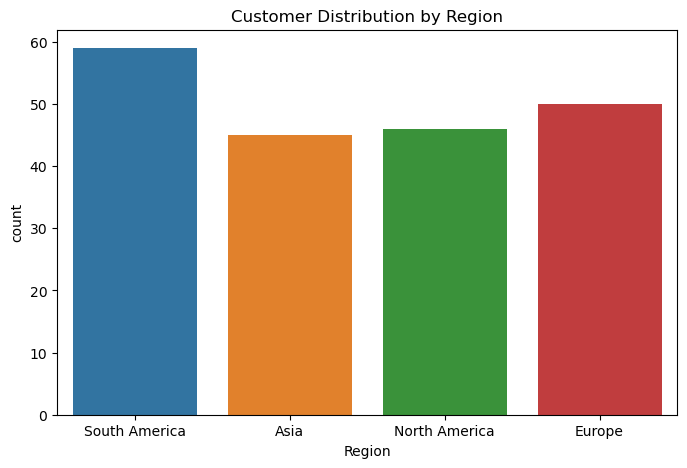

In [55]:
plt.figure(figsize=(8, 5))
sns.countplot(data=customers, x='Region')
plt.title('Customer Distribution by Region')
plt.show()

In [56]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [57]:
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('Month').size()

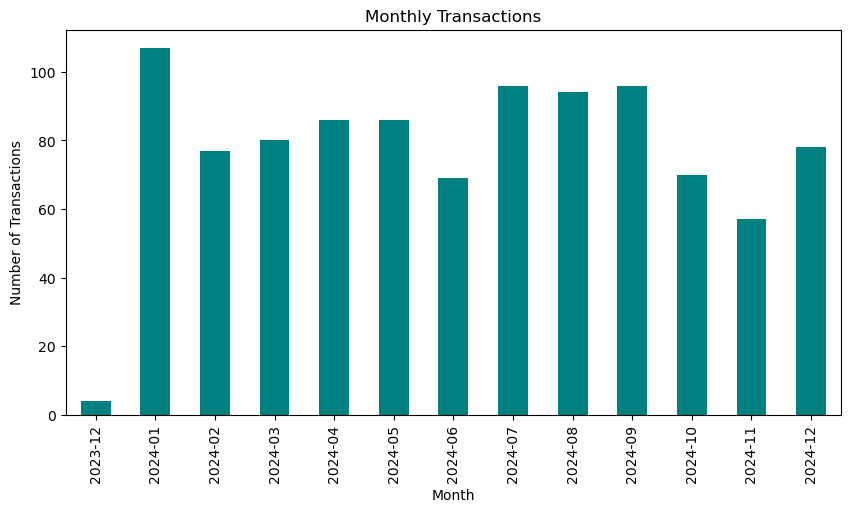

In [58]:
plt.figure(figsize=(10, 5))
monthly_sales.plot(kind='bar', color='teal')
plt.title('Monthly Transactions')
plt.ylabel('Number of Transactions')
plt.show()

In [60]:
top_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head()
print(top_products)

ProductID
P059    46
P054    46
P029    45
P079    43
P061    43
Name: Quantity, dtype: int64


In [63]:
transactions['TotalSpend'] = transactions['Quantity'] * transactions['Price']  # Or use 'TotalValue' if available
customer_spending = transactions.groupby('CustomerID')['TotalSpend'].sum()
top_customers = customer_spending.sort_values(ascending=False).head()
print(top_customers)

CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
Name: TotalSpend, dtype: float64


In [64]:
product_quantity = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head()
print(product_quantity)

ProductID
P059    46
P054    46
P029    45
P079    43
P061    43
Name: Quantity, dtype: int64


In [65]:
with open("Sonal_Garg_EDA.pdf", "w") as f:
    f.write("Business Insights:\n")
    f.write("1. Region distribution shows a mix of North, South, East, and West.\n")
    f.write("2. Monthly transactions show an increasing trend.\n")
    f.write("3. Top 5 products by quantity sold are identified.\n")
    f.write("4. Top customers based on total spending can be targeted for retention.\n")
    f.write("5. Product quantity patterns help identify high-demand items.\n")